<a href="https://colab.research.google.com/github/27Steff/GamesAnalysis/blob/main/GamesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
df = pd.read_csv("data/games.csv", encoding="utf-8")

In [6]:
df.head()

AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a hacker who has arrang...   

                                 Supported languages  ...  \
0                                        ['English']  ...   
1  ['English', 'French', 'Italian', 'German', 'Sp...  ...   
2                 ['English', 'Portuguese - Brazil']  ...   
3  ['English', 'French', 'Italian', 'German', 'Sp...  ...   
4                     ['English', 'Spanish - Spain']  ...   

  Average playtime two weeks Median playtime forever  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

  Median playtime two weeks             Developers             Publishers  \
0                         0  Perpetual FX Creative  Perpetual FX Creative   
1                         0           Rusty Moyher           Wild Rooster   
2                         0          Campião Games          Campião Games   
3                         0      Odd Critter Games      Odd Critter Games   
4                         0          Unusual Games          Unusual Games   

                                          Categories  \
0  Single-player,Multi-player,Steam Achievements,...   
1  Single-player,Steam Achievements,Full controll...   
2                                      Single-player   
3              Single-player,Full controller support   
4                   Single-player,Steam Achievements   

                            Genres  \
0              Casual,Indie,Sports   
1                     Action,Indie   
2  Action,Adventure,Indie,Strategy   
3           Adventure,Casual,Indie   
4                  Adventure,Indie   

                                                Tags  \
0                        Indie,Casual,Sports,Bowling   
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...   
2                                                NaN   
3  2D Platformer,Atmospheric,Surreal,Mystery,Puzz...   
4  Indie,Adventure,Nudity,Violent,Sexual Content,...   

                                         Screenshots  \
0  https://cdn.akamai.steamstatic.com/steam/apps/...   
1  https://cdn.akamai.steamstatic.com/steam/apps/...   
2  https://cdn.akamai.steamstatic.com/steam/apps/...   
3  https://cdn.akamai.steamstatic.com/steam/apps/...   
4  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                              Movies  
0  http://cdn.akamai.steamstatic.com/steam/apps/2...  
1  http://cdn.akamai.steamstatic.com/steam/apps/2...  
2  http://cdn.akamai.steamstatic.com/steam/apps/2...  
3  http://cdn.akamai.steamstatic.com/steam/apps/2...  
4  http://cdn.akamai.steamstatic.com/steam/apps/2...  

[5 rows x 39 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [8]:
df = df.drop(df.columns[[4, 5, 7,10,12,13,14,15,24,20,21,25,28, 29, 30, 31, 19,26,27,37,38]], axis=1) #we drop the columns we won't be using

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AppID                71716 non-null  int64  
 1   Name                 71715 non-null  object 
 2   Release date         71716 non-null  object 
 3   Estimated owners     71716 non-null  object 
 4   Price                71716 non-null  float64
 5   About the game       69280 non-null  object 
 6   Supported languages  71716 non-null  object 
 7   Reviews              9167 non-null   object 
 8   Windows              71716 non-null  bool   
 9   Mac                  71716 non-null  bool   
 10  Linux                71716 non-null  bool   
 11  Positive             71716 non-null  int64  
 12  Negative             71716 non-null  int64  
 13  Developers           69255 non-null  object 
 14  Publishers           68996 non-null  object 
 15  Categories           68309 non-null 

In [10]:
df.isna().values.any()

True

In [11]:
print(df.isnull().any())#Finding null values

AppID                  False
Name                    True
Release date           False
Estimated owners       False
Price                  False
About the game          True
Supported languages    False
Reviews                 True
Windows                False
Mac                    False
Linux                  False
Positive               False
Negative               False
Developers              True
Publishers              True
Categories              True
Genres                  True
Tags                    True
dtype: bool


In [494]:
#We replace all tha NaN spaces

In [44]:
df["About the game"].fillna('', inplace = True)
df["Reviews"].fillna('', inplace = True)
df["Developers"].fillna('Unknown', inplace = True)
df["Publishers"].fillna('Unknown', inplace = True)
df["Genres"].fillna('Unknown', inplace = True)
df["Year"].fillna(0, inplace = True)
df["PositivePer"].fillna(0, inplace = True)

In [12]:
#Fix formating for the date

In [13]:
df['Price'] = df['Price'].astype(float)

In [14]:
df["Release date"]

0        Oct 21, 2008
1        Oct 12, 2017
2        Nov 17, 2021
3        Jul 23, 2020
4         Feb 3, 2020
             ...     
71711     Apr 1, 2023
71712    Mar 30, 2023
71713    Mar 27, 2023
71714     Apr 2, 2023
71715    Mar 30, 2023
Name: Release date, Length: 71716, dtype: object

In [15]:
df.duplicated().values.any()

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AppID                71716 non-null  int64  
 1   Name                 71715 non-null  object 
 2   Release date         71716 non-null  object 
 3   Estimated owners     71716 non-null  object 
 4   Price                71716 non-null  float64
 5   About the game       69280 non-null  object 
 6   Supported languages  71716 non-null  object 
 7   Reviews              9167 non-null   object 
 8   Windows              71716 non-null  bool   
 9   Mac                  71716 non-null  bool   
 10  Linux                71716 non-null  bool   
 11  Positive             71716 non-null  int64  
 12  Negative             71716 non-null  int64  
 13  Developers           69255 non-null  object 
 14  Publishers           68996 non-null  object 
 15  Categories           68309 non-null 

In [ ]:
#Format and divide date in year date and day

In [17]:
df['Date'] = df['Release date'].str.replace(',', '')

In [18]:
df["Date"].head()


0    Oct 21 2008
1    Oct 12 2017
2    Nov 17 2021
3    Jul 23 2020
4     Feb 3 2020
Name: Date, dtype: object

In [19]:
df['Date'] = df['Date'].str.split(' ')

In [20]:
df["Date"].head()

0    [Oct, 21, 2008]
1    [Oct, 12, 2017]
2    [Nov, 17, 2021]
3    [Jul, 23, 2020]
4     [Feb, 3, 2020]
Name: Date, dtype: object

In [21]:
df["Year"] = df["Date"].str[2]
df["Month"] = df["Date"].str[0]
df["Day"] = df["Date"].str[1]

In [22]:
df["Year"].head()

0    2008
1    2017
2    2021
3    2020
4    2020
Name: Year, dtype: object

In [23]:
print(f'The average price of the Steam games is: ${df.Price.mean()} ') #Average price for game

The average price of the Steam games is: $7.223054827374643 


In [24]:
df["PositivePer"] = (df.Positive/(df.Positive + df.Negative)) #We calculate the percentage of votes that are positive over the total recollected

In [25]:
df["PositivePer"].head()

0    0.352941
1    0.913793
2         NaN
3    1.000000
4    0.862069
Name: PositivePer, dtype: float64

In [26]:
df.sort_values(by = 'Price', ascending = False)[:5] #Most expensive games

AppID                               Name  Release date  \
26936  1200520  Ascent Free-Roaming VR Experience  Dec 27, 2019   
57689   253670              Aartform Curvy 3D 3.0  Nov 12, 2013   
32110   502570                      Houdini Indie  Oct 10, 2018   
12150  1698340      VEGAS 19 Edit - Steam Edition   Sep 9, 2021   
23459  1699510             Reincarnation of Ocean   Aug 7, 2021   

      Estimated owners   Price  \
26936        0 - 20000  999.00   
57689        0 - 20000  299.90   
32110        0 - 20000  269.99   
12150        0 - 20000  249.00   
23459        0 - 20000  199.99   

                                          About the game  \
26936  The Ascent is a Free-Roaming highly immersive ...   
57689  Curvy 3D 3.0 is an innovative sculpting progra...   
32110  As an indie game dev you are faced with the ch...   
12150  Record multiple video and audio sources and br...   
23459  It tells the story of Prince Elves from Eulus ...   

                                     Supported languages Reviews  Windows  \
26936                                        ['English']     NaN     True   
57689                                        ['English']     NaN     True   
32110                                        ['English']     NaN     True   
12150  ['English', 'French', 'German', 'Spanish - Spa...     NaN     True   
23459                  ['English', 'Simplified Chinese']     NaN     True   

         Mac  ...           Developers           Publishers  \
26936  False  ...           Fury Games           Fury Games   
57689  False  ...             Aartform             Aartform   
32110   True  ...               SideFX               SideFX   
12150  False  ...  MAGIX Software GmbH  MAGIX Software GmbH   
23459  False  ...        CatCat Gaming        CatCat Gaming   

                                       Categories  \
26936  Single-player,Multi-player,Co-op,LAN Co-op   
57689                               Single-player   
32110      Partial Controller Support,Steam Cloud   
12150                                         NaN   
23459                               Single-player   

                                                  Genres  \
26936                                             Action   
57689                               Animation & Modeling   
32110  Animation & Modeling,Design & Illustration,Vid...   
12150                                   Video Production   
23459                                              Indie   

                                                    Tags             Date  \
26936  Action,VR,Free to Play,Multiplayer,Arena Shoot...  [Dec, 27, 2019]   
57689                               Animation & Modeling  [Nov, 12, 2013]   
32110  Animation & Modeling,Game Development,3D,Desig...  [Oct, 10, 2018]   
12150              Video Production,Psychological Horror   [Sep, 9, 2021]   
23459                                                NaN   [Aug, 7, 2021]   

       Year Month Day PositivePer  
26936  2019   Dec  27    1.000000  
57689  2013   Nov  12    0.711111  
32110  2018   Oct  10    0.952703  
12150  2021   Sep   9    0.714286  
23459  2021   Aug   7         NaN  

[5 rows x 23 columns]

In [27]:
df.Categories.unique()

array(['Single-player,Multi-player,Steam Achievements,Partial Controller Support',
       'Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,Remote Play on TV',
       'Single-player', ...,
       'Single-player,Steam Achievements,Full controller support,Tracked Controller Support,VR Supported,Steam Cloud',
       'Single-player,Steam Achievements,Tracked Controller Support,VR Only,Steam Cloud,Stats,Remote Play Together',
       'Single-player,Multi-player,PvP,Shared/Split Screen PvP,Co-op,Shared/Split Screen Co-op,Shared/Split Screen,Full controller support,Steam Workshop,Remote Play Together'],
      dtype=object)

In [ ]:
#Formatting and finding relevant categories

In [28]:
df['Category'] = df['Categories'].str.split(',')

In [29]:
df["Category"].head()

0    [Single-player, Multi-player, Steam Achievemen...
1    [Single-player, Steam Achievements, Full contr...
2                                      [Single-player]
3             [Single-player, Full controller support]
4                  [Single-player, Steam Achievements]
Name: Category, dtype: object

In [30]:
df["Category"] = df["Category"].str[0]

In [31]:
df['Genre'] = df['Genres'].str.split(',')

In [ ]:
#Formatting and finding relevant genres

In [32]:
df["Genre"].head()

0                 [Casual, Indie, Sports]
1                         [Action, Indie]
2    [Action, Adventure, Indie, Strategy]
3              [Adventure, Casual, Indie]
4                      [Adventure, Indie]
Name: Genre, dtype: object

In [33]:
df['MainGenre'] = df['Genre'].str[0]

In [ ]:
#Formatting and finding relevant tags

In [34]:
df['Tag'] = df['Tags'].str.split(',')

In [35]:
df['Tag'] = df['Tag'].str[1]

In [36]:
df["Tag"].head()

0         Casual
1         Action
2            NaN
3    Atmospheric
4      Adventure
Name: Tag, dtype: object

In [37]:
df.MainGenre.unique()

array(['Casual', 'Action', 'Adventure', 'Indie', 'Strategy',
       'Massively Multiplayer', 'Utilities', 'Racing', 'Simulation',
       'Free to Play', 'RPG', nan, 'Sexual Content',
       'Design & Illustration', 'Animation & Modeling',
       'Game Development', 'Nudity', 'Education', 'Violent',
       'Photo Editing', 'Software Training', 'Sports', 'Audio Production',
       'Web Publishing', 'Video Production', 'Early Access', 'Gore',
       'Accounting'], dtype=object)

In [38]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Price',
       'About the game', 'Supported languages', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Positive', 'Negative', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Date', 'Year', 'Month', 'Day',
       'PositivePer', 'Category', 'Genre', 'MainGenre', 'Tag'],
      dtype='object')

In [ ]:
#Grouping by year to check the amount of games that were released per year

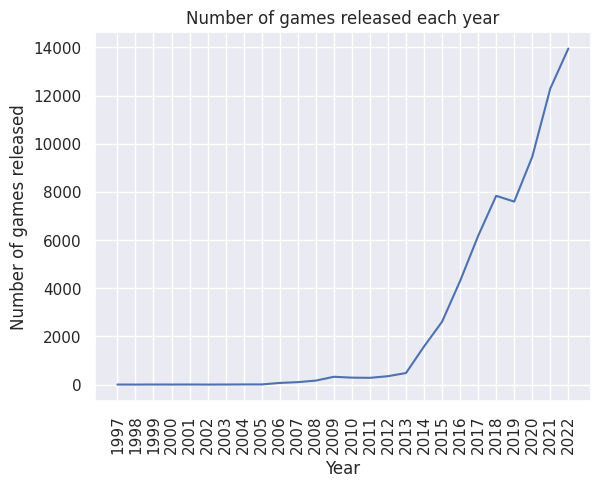

In [39]:
gamesyear = df.groupby('Year')['Name'].count()

# Create the line plot
sns.set(style="darkgrid")
plt.plot(gamesyear.index[:-2], gamesyear.values[:-2])
plt.xlabel('Year')
plt.xticks(rotation='vertical')
plt.ylabel('Number of games released')
plt.title('Number of games released each year')
plt.show()


In [ ]:
#Popularity of games per genre

In [40]:
gamesgenre = df.groupby('MainGenre')['Name'].count()


<ipython-input-41-e2e4eda4b0b8>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Accounting'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Adventure'),
 Text(3, 0, 'Animation & Modeling'),
 Text(4, 0, 'Audio Production'),
 Text(5, 0, 'Casual'),
 Text(6, 0, 'Design & Illustration'),
 Text(7, 0, 'Early Access'),
 Text(8, 0, 'Education'),
 Text(9, 0, 'Free to Play'),
 Text(10, 0, 'Game Development'),
 Text(11, 0, 'Gore'),
 Text(12, 0, 'Indie'),
 Text(13, 0, 'Massively Multiplayer'),
 Text(14, 0, 'Nudity'),
 Text(15, 0, 'Photo Editing'),
 Text(16, 0, 'RPG'),
 Text(17, 0, 'Racing'),
 Text(18, 0, 'Sexual Content'),
 Text(19, 0, 'Simulation'),
 Text(20, 0, 'Software Training'),
 Text(21, 0, 'Sports'),
 Text(22, 0, 'Strategy'),
 Text(23, 0, 'Utilities'),
 Text(24, 0, 'Video Production'),
 Text(25, 0, 'Violent'),
 Text(26, 0, 'Web Publishing')]

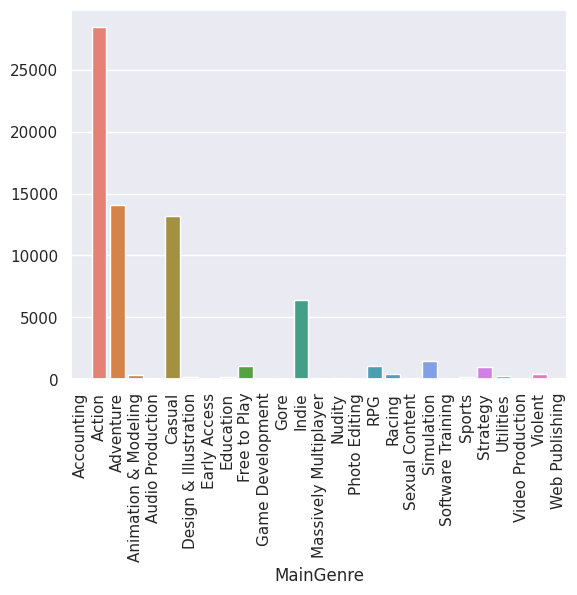

In [41]:
plot = sns.barplot(x=gamesgenre.index, y=gamesgenre.values, hue = gamesgenre.index, legend=False)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [45]:
df.MainGenre =df.MainGenre.astype('category')
df.PositivePer =df.PositivePer.astype('float')
df['Year'] = df['Year'].astype(int)

In [ ]:
#Plot of genre vs the positive percentage of opinions

In [46]:
fig = px.scatter(df, x="MainGenre", y="PositivePer",
                 color="PositivePer",
                 hover_data=['Name'], width=1200, height=1000)

fig.update(layout_showlegend=False)

fig.show()


In [ ]:
#Grouping by developers and publishers and finding the ones that have released more games

In [75]:
gamesdev = df.groupby('Developers')['Name'].count()
gamesdev.sort_values(ascending = False)[1::5]

Developers
Choice of Games                     148
Atomic Fabrik,Cristian Manolachi     99
Blender Games                        71
Ripknot Systems                      62
Cyber Keks                           57
                                   ... 
ISVR,北京互联星梦科技有限公司                     1
IOSoccer Team                         1
INTENSE                               1
INTO GAMES                            1
IO Entertainment                      1
Name: Name, Length: 8523, dtype: int64

In [76]:
gamesdev = df.groupby('Publishers')['Name'].count()
gamesdev.sort_values(ascending = False)[1::5]

Publishers
Big Fish Games                 460
HH-Games                       151
THQ Nordic                     128
Plug In Digital                108
Devolver Digital               101
                              ... 
IceSimba                         1
Ice World                        1
Ice Goat Games                   1
Ice Arrow Games,Offy D Corp      1
Ibe Denaux                       1
Name: Name, Length: 7363, dtype: int64

36815

In [ ]:
#Amount of games in every category of price and Positive opinion percentage

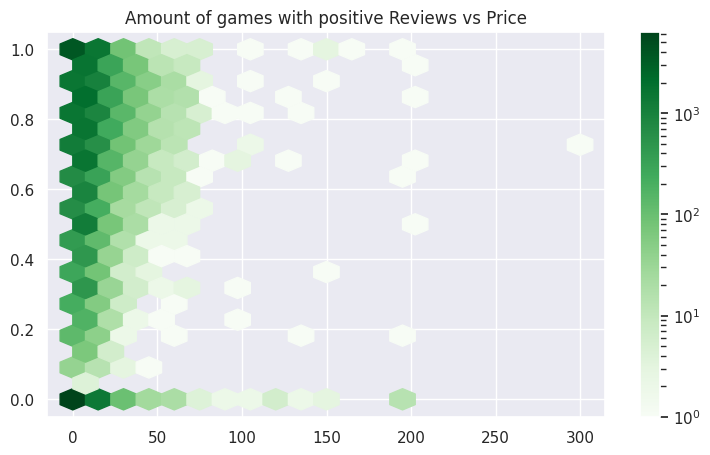

In [49]:

fig,(ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))

hb = ax1.hexbin(df["Price"][::-2], df["PositivePer"][::-2], gridsize=20, bins='log', cmap='Greens')
ax1.set_title("Amount of games with positive Reviews vs Price")
cb = fig.colorbar(hb, ax=ax1)